In [1]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import CategoricalDtype
import IPython.display as ipd
from tqdm.notebook import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from collections import Counter
from collections import defaultdict
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

import ast

from collections import defaultdict
from scipy.stats.stats import pearsonr

plt.rcParams['axes.formatter.useoffset']=False
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 150

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [2]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

In [3]:
features = [
 'chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_censcqtkurtosis',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'spectral_contrastkurtosis',
 'spectral_contrastmax',
 'spectral_contrastmean',
 'spectral_contrastmedian',
 'spectral_contrastmin',
 'spectral_contrastskew',
 'spectral_contraststd',
 'tonnetzkurtosis',
 'tonnetzmax',
 'tonnetzmean',
 'tonnetzmedian',
 'tonnetzmin',
 'tonnetzskew',
 'tonnetzstd',
 'rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_rolloffmean01',
 'spectral_rolloffmedian01',
 'spectral_rolloffmin01',
 'spectral_rolloffskew01',
 'spectral_rolloffstd01',
 'zcrkurtosis01',
 'zcrmax01',
 'zcrmean01',
 'zcrmedian01',
 'zcrmin01',
 'zcrskew01',
 'zcrstd01',
]


bitmap = [
    'Blues',
 'Classical',
 'Country',
 'Easy Listening',
 'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Jazz',
 'Old-Time / Historic',
 'Pop',
 'Rock',
 'Soul-RnB',
 'Spoken',
]

nulli = [
     'ALBUM_date_released_year',
    'ALBUM_favorites',
     'ALBUM_listens',
 'ALBUM_tracks',
 'ALBUM_type',
 'ARTIST_favorites',
 'ARTIST_location',
 'TRACK_favorites',
  'ARTIST_location_',
    'TRACK_genres_soloTop'
]

nonNumerici = [
    'ALBUM_tags',
    'ALBUM_title',
    'ARTIST_location_',
    'ARTIST_name',
    'ARTIST_tags',
    'SET_subset',
    'TRACK_genre_top',
    'TRACK_genres',
    'TRACK_genres_all',
    'TRACK_genres_soloTop',
    'TRACK_tags',
    'TRACK_title',
    'TRACK_genres_soloTop'
]

In [4]:
def Diff(li1, li2):
    return list(set(li1)-set(li2))

tutti = list(df.columns)

compl = Diff(tutti, features + bitmap + nonNumerici + nulli)

compl.sort()

compl

['ALBUM_date_released_year_',
 'ALBUM_favorites_',
 'ALBUM_listens_',
 'ALBUM_tracks_',
 'ALBUM_type_',
 'ARTIST_favorites_',
 'TRACK_bitrate',
 'TRACK_duration',
 'TRACK_interest',
 'TRACK_listens',
 'TRACK_number']

In [5]:
df[bitmap] = df[bitmap].fillna(value=0)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = dict()
column2encode = ['ALBUM_type_']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select two continuous attributes

In [132]:
#pca = PCA(n_components=2)
#pca.fit(df[df["TRACK_duration"] < 2500][attributes])
#X_pca = pca.transform(df[df["TRACK_duration"] < 2500][attributes])

df0 = df[df["TRACK_duration"] < 2500]

X = df0[["chroma_censmax", "spectral_contrastmax"]].values
y = df0["TRACK_duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [125]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [126]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-228.49193728    5.30589643]
Intercept: 
 267.3030039823334


In [127]:
y_pred = reg.predict(X_test)

In [128]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.139
MSE: 48689.965
MAE: 128.682


In [129]:
x_values = sorted([v for v in X_test.T[1]])
y_values = y_pred[np.argsort(X_test.T[1])]

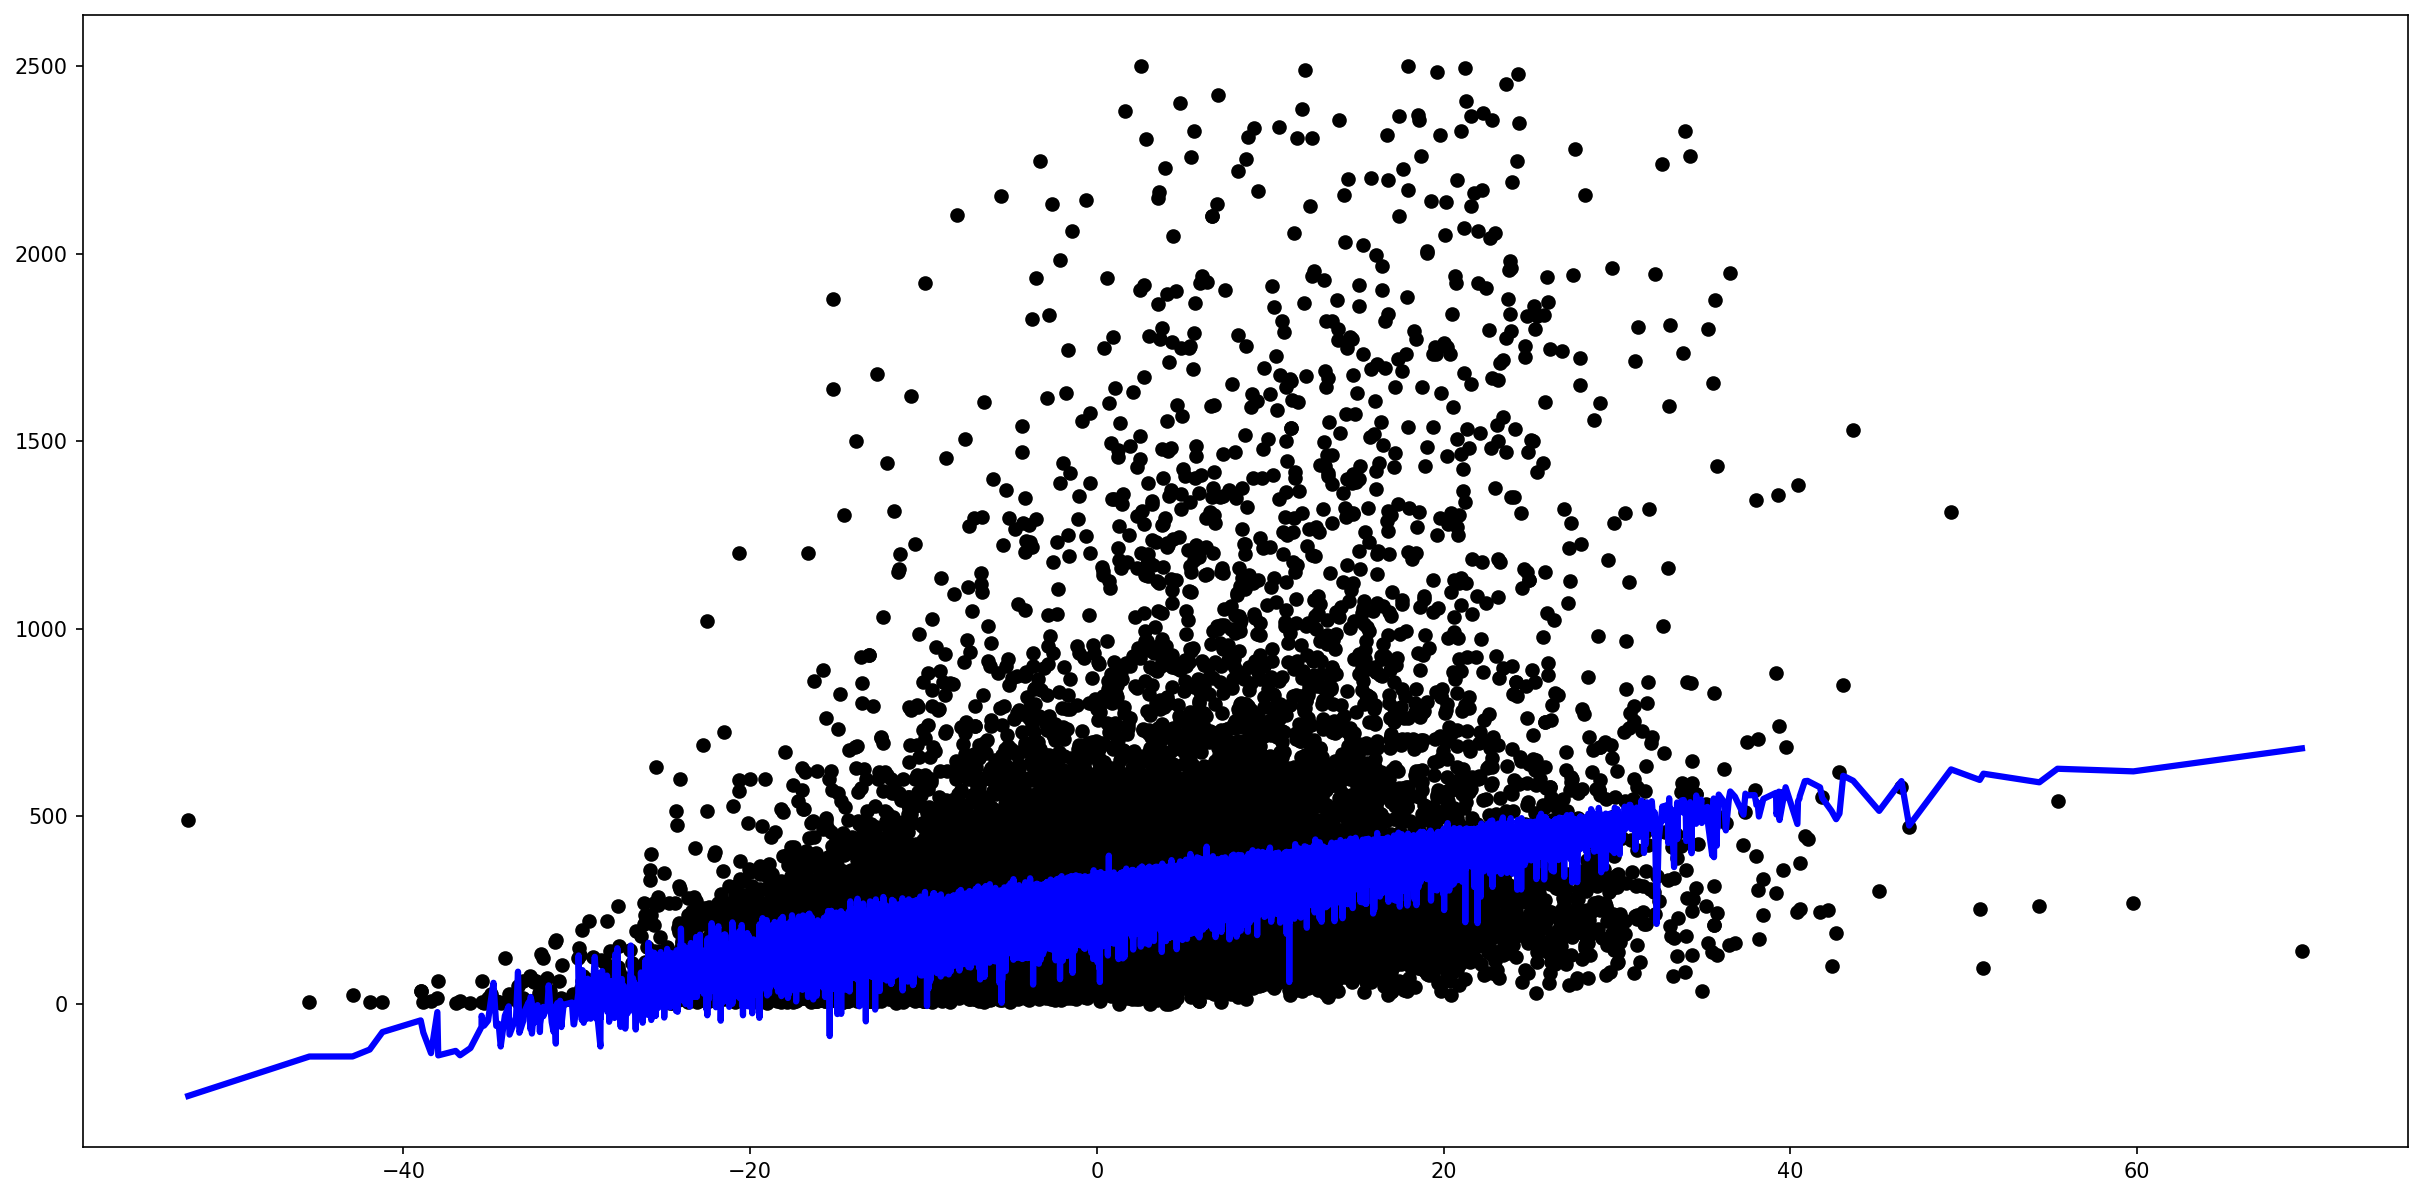

In [130]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()

In [100]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0. 0.]
Intercept: 
 0.8165621214486073


In [101]:
y_pred = reg.predict(X_test)

In [102]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.784
MAE: 0.699


In [97]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.23050914 0.24238697]
Intercept: 
 -2.4694607341529395


In [98]:
y_pred = reg.predict(X_test)

In [99]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.493
MSE: 0.398
MAE: 0.507


# Data Partitioning

In [82]:
corr = df[compl].corr()
corr.style.background_gradient(cmap='coolwarm')

,ALBUM_date_released_year_,ALBUM_favorites_,ALBUM_listens_,ALBUM_tracks_,ALBUM_type_,ARTIST_favorites_,TRACK_bitrate,TRACK_duration,TRACK_interest,TRACK_listens,TRACK_number
ALBUM_date_released_year_,1.000000,0.014179,0.126269,0.037136,-0.088836,0.068948,0.350858,0.013819,0.049260,0.126269,0.037136
ALBUM_favorites_,0.014179,1.000000,0.689951,-0.117479,-0.054382,0.370832,0.030397,-0.028433,0.687670,0.689951,-0.117479
ALBUM_listens_,0.126269,0.689951,1.000000,-0.150692,-0.090749,0.330990,0.042929,-0.013858,0.931207,1.000000,-0.150692
ALBUM_tracks_,0.037136,-0.117479,-0.150692,1.000000,-0.073039,-0.046590,0.044493,-0.007655,-0.159774,-0.150692,1.000000
ALBUM_type_,-0.088836,-0.054382,-0.090749,-0.073039,1.000000,-0.072095,-0.124607,0.067013,-0.096583,-0.090749,-0.073039
ARTIST_favorites_,0.068948,0.370832,0.330990,-0.046590,-0.072095,1.000000,0.069113,-0.051210,0.342898,0.330990,-0.046590
TRACK_bitrate,0.350858,0.030397,0.042929,0.044493,-0.124607,0.069113,1.000000,0.003118,0.004646,0.042929,0.044493
TRACK_duration,0.013819,-0.028433,-0.013858,-0.007655,0.067013,-0.051210,0.003118,1.000000,-0.020644,-0.013858,-0.007655
TRACK_interest,0.049260,0.687670,0.931207,-0.159774,-0.096583,0.342898,0.004646,-0.020644,1.000000,0.931207,-0.159774
TRACK_listens,0.126269,0.689951,1.000000,-0.150692,-0.090749,0.330990,0.042929,-0.013858,0.931207,1.000000,-0.150692


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.corrwith(other=df["TRACK_duration"]).sort_values())

chroma_censmax                 -0.281663
tonnetzmin                     -0.235268
spectral_contrastmin           -0.138952
chroma_cqtmin                  -0.136705
chroma_censmin                 -0.129294
mfccskew                       -0.109305
spectral_centroidmin01         -0.088400
chroma_stftmin                 -0.086125
spectral_rolloffmin01          -0.085629
rmsemedian01                   -0.085163
rmsemean01                     -0.084401
Rock                           -0.083546
Pop                            -0.082993
spectral_bandwidthmin01        -0.071346
ARTIST_favorites               -0.070964
zcrmin01                       -0.070239
rmsestd01                      -0.067366
Hip-Hop                        -0.067142
ALBUM_listens                  -0.065132
ALBUM_favorites                -0.064627
chroma_stftstd                 -0.063498
ALBUM_tracks                   -0.057068
ARTIST_favorites_              -0.051210
mfccstd                        -0.049615
chroma_censstd  

In [134]:
class_name = 'TRACK_duration'

attributes = compl + features
#discreti da rimuovere
attributes.remove("ALBUM_type_")
attributes.remove("ALBUM_date_released_year_")
attributes.remove("TRACK_bitrate")
attributes.remove('TRACK_number')
attributes.remove('ALBUM_tracks_')
attributes.remove(class_name)


X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Linear Regression

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [136]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [137]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-4.87905026e+00  7.01389136e+00 -4.52211458e-02 -7.56403501e+00
  7.01389136e+00  1.96405774e-01 -2.50746826e+02  4.85035032e+00
  2.81096901e+01  5.62484167e+02 -2.26734467e+01 -4.83665606e+02
  5.40885072e-02  1.57797019e+02 -3.04567366e+02  1.00543741e+02
 -2.07797111e+02  1.68609189e+01  7.37505375e+02  3.13468402e-01
  5.46518076e+01 -2.92801388e+01  2.75261848e+01  6.64910038e+00
  1.24745570e+00  2.27139147e+02  5.48157140e-01 -3.32904067e-01
  1.41059236e+00 -5.60517761e-01 -2.80436000e-01 -6.62288835e+00
 -8.18263554e-01 -2.22731361e+00  8.65290419e+00 -1.54015858e+01
  1.02071984e+01 -5.18862739e+00  5.76226777e+00 -2.07958135e+01
 -2.24147895e+00  6.33065042e+02  4.22185123e+01  2.67389954e+01
 -6.30134179e+02  5.61892262e+00 -2.37379484e+03  8.03553989e-01
  8.70696013e+00 -1.98774699e+01  1.30202811e+01 -9.89152085e+00
 -2.24761308e+01 -2.71465666e+01  3.44310422e-01  5.89092670e-03
 -8.64972686e-02  8.44740465e-02  4.20654038e-02  2.29850737e+00
  1.73931

In [138]:
y_pred = reg.predict(X_test)

In [140]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.313
MSE: 59425.740
MAE: 127.898


## Linear Regression in 2 dimensions

In [136]:
reg = LinearRegression()
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.000
MSE: 86544.758
MAE: 148.846


In [137]:
x_values = sorted([v for v in X_test.T[1]])
y_values = y_pred[np.argsort(X_test.T[1])]

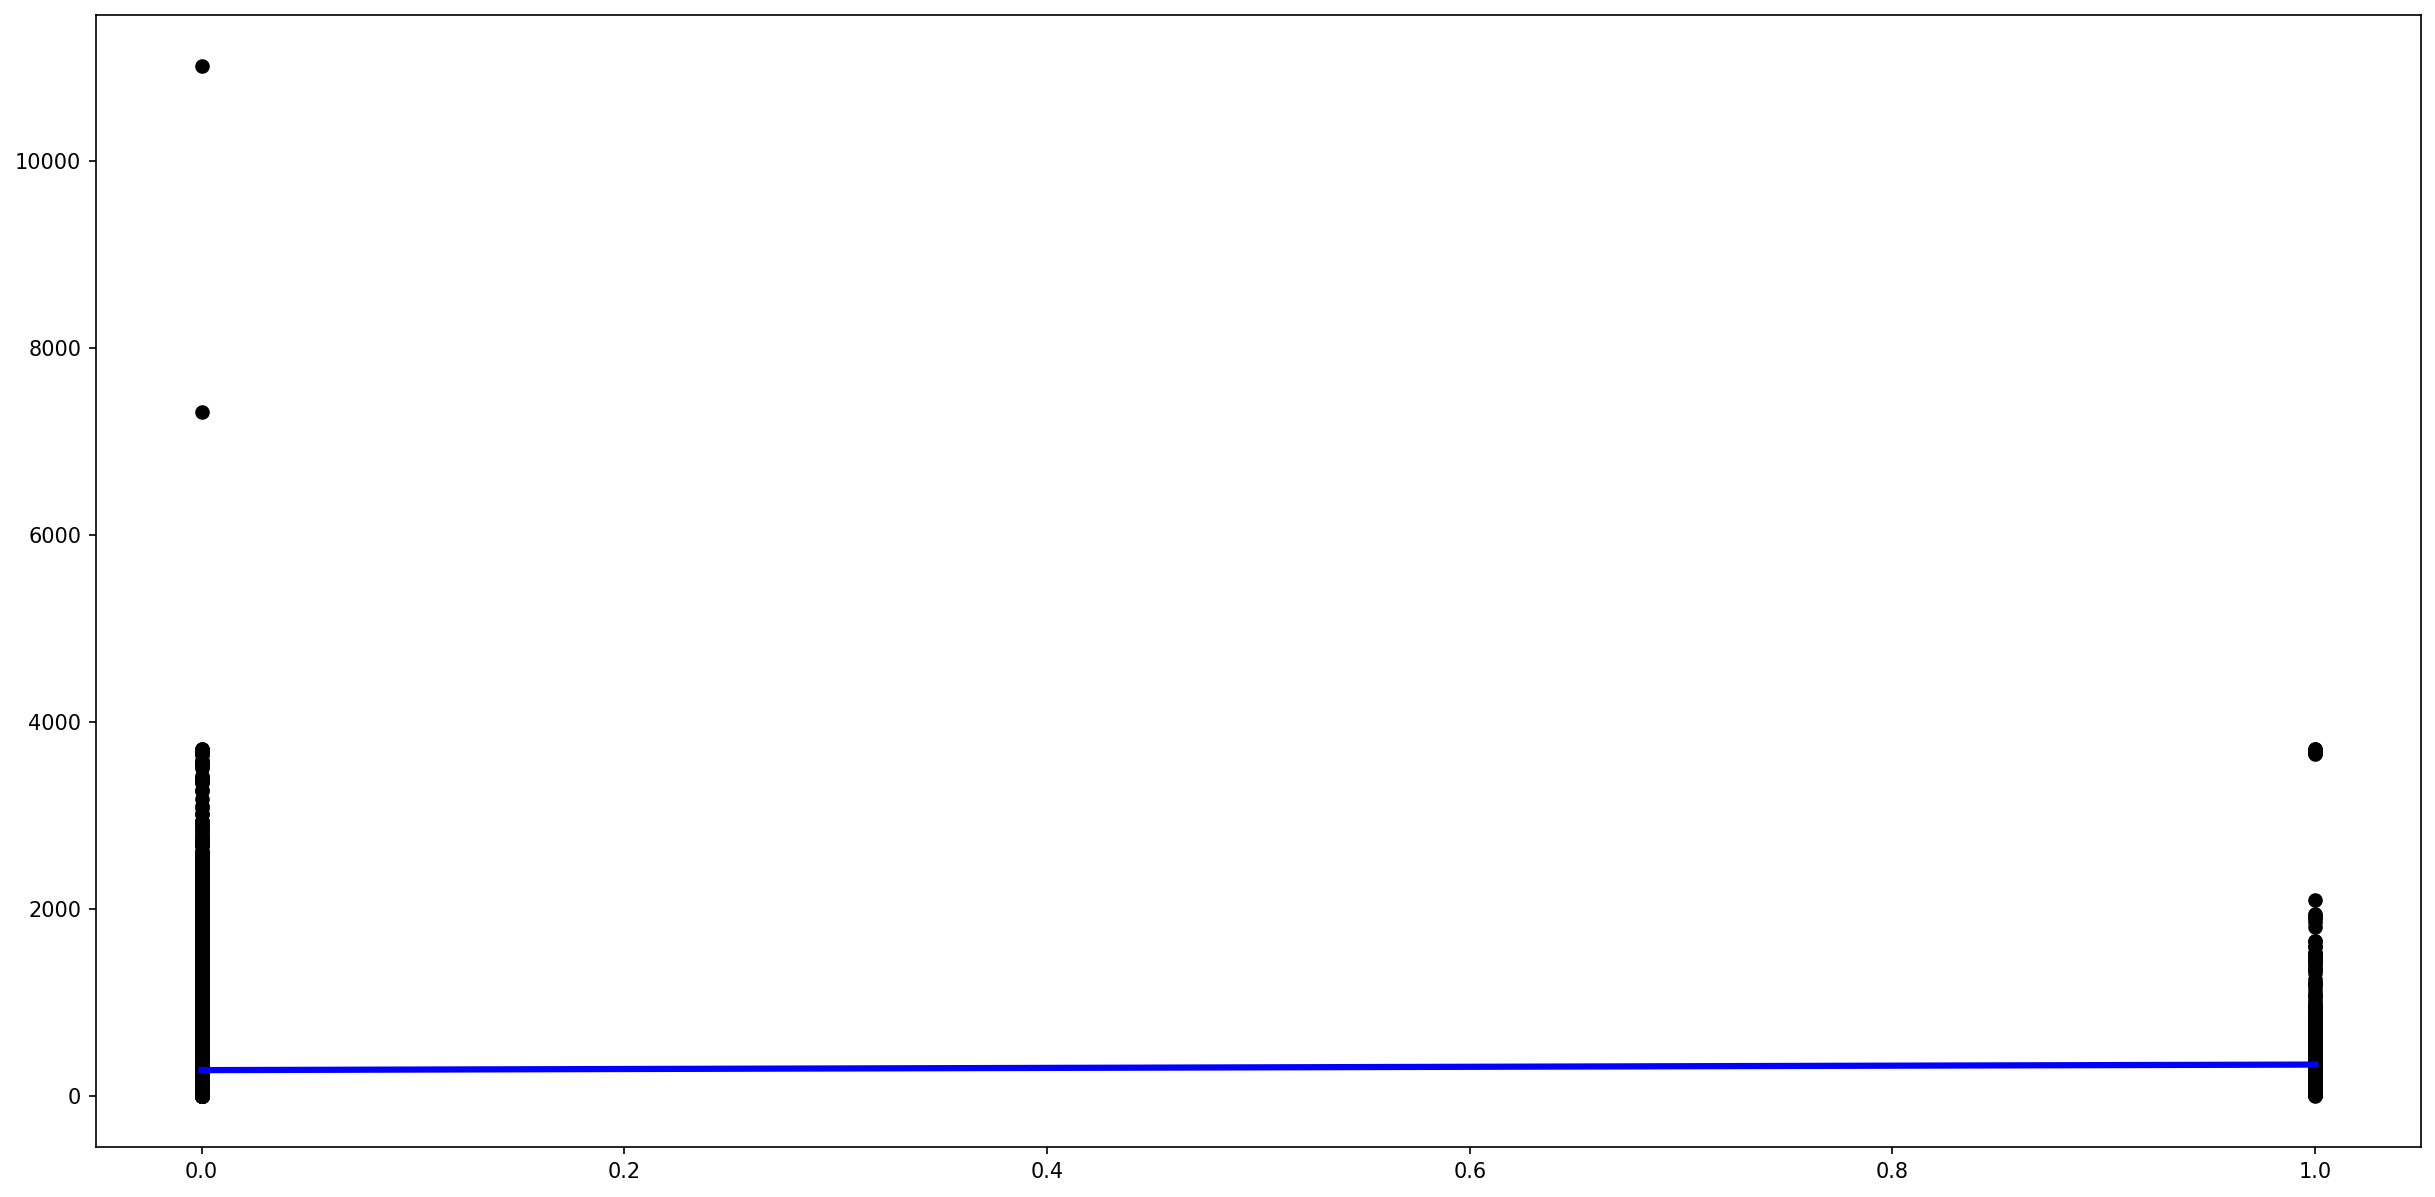

In [192]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()

# Lasso

In [141]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-4.60598630e+00  3.65183909e+00 -9.29348208e-02 -0.00000000e+00
  2.19624340e+00  1.16106452e-01 -2.85862025e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.27419957e+00  0.00000000e+00
  7.08140379e-03  0.00000000e+00 -5.29685225e+01 -7.75542238e+01
  0.00000000e+00  0.00000000e+00  4.89397521e+02  6.49667168e-01
  0.00000000e+00 -0.00000000e+00  6.93015669e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.44499224e-01 -4.61118114e-01
  1.71198826e+00 -8.05361333e-01 -2.71778872e-01 -2.03203946e+00
 -8.73174297e-01 -2.86191380e+00  1.01923230e+01 -1.75619050e+01
  1.13629108e+01 -5.98238751e+00  7.68955954e+00 -2.42795137e+01
 -5.70962489e-01  1.69900315e+02  0.00000000e+00  0.00000000e+00
 -1.57303603e+02  3.95333803e-01 -0.00000000e+00  7.98965418e-01
  9.23723423e+00 -6.40144143e+00  1.37297064e+00 -0.00000000e+00
 -1.94072575e+01 -3.73803267e+01  4.15509337e-01  3.01513636e-02
 -9.28189886e-02  9.06224571e-02  4.48273068e-02  1.90514258e+00
  1.93844

C:\Users\falle\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1045839865.8466799, tolerance: 705584.0090109119
  model = cd_fast.enet_coordinate_descent(


In [142]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.270
MSE: 63191.679
MAE: 128.222


# Ridge

In [143]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-5.01533470e+00  6.95304802e+00 -4.60105324e-02 -7.42444276e+00
  6.95304802e+00  1.95695509e-01 -2.61322305e+02  3.40447042e+00
  2.81943576e+01  5.50032931e+02 -2.25196630e+01 -4.19649209e+02
  5.40556832e-02  1.59729478e+02 -2.98950283e+02  9.74670253e+01
 -2.04113977e+02  1.67783529e+01  7.19021265e+02  3.41221238e-01
  4.70024745e+01 -2.73213458e+01  2.75054475e+01  6.53061018e+00
  7.01296478e-01  2.28433595e+02  5.52506440e-01 -3.37650132e-01
  1.42252051e+00 -5.66678420e-01 -2.79647465e-01 -6.59508424e+00
 -8.22786429e-01 -2.25043160e+00  8.67680283e+00 -1.56013071e+01
  1.03611105e+01 -5.24465008e+00  5.76469810e+00 -2.07345443e+01
 -2.18916910e+00  6.16602738e+02  3.84315963e+01  2.34872349e+01
 -6.12722921e+02  5.58231756e+00 -2.23506467e+03  8.04924843e-01
  8.78828244e+00 -1.97590240e+01  1.28883733e+01 -9.94857557e+00
 -2.25571216e+01 -2.75869804e+01  3.43142949e-01  6.38345719e-03
 -9.96977182e-02  9.26660263e-02  4.56058931e-02  2.47057582e+00
  1.83526

In [144]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.313
MSE: 59499.574
MAE: 127.748


In [189]:
#Per trovare parametro alpha
parameters=range(0, 100, 1)
res = list()

for a in parameters:
    reg = Ridge(alpha=a/100)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    res.append([a, reg.intercept_, r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)])

result = pd.DataFrame(res, columns=['alpha', 'intercept', 'r2', 'mse', 'mae'])

In [190]:
result

,alpha,intercept,r2,mse,mae
0,0,-3109.777689,0.326313,58305.137134,127.198509
1,1,-3108.543869,0.326308,58305.570533,127.196426
2,2,-3107.509037,0.326301,58306.143647,127.194306
3,3,-3106.509680,0.326294,58306.716614,127.192216
4,4,-3105.543940,0.326288,58307.288674,127.190180
...,...,...,...,...,...
95,95,-3070.420921,0.325854,58344.872502,127.057643
96,96,-3070.255652,0.325850,58345.181377,127.056404
97,97,-3070.092227,0.325846,58345.489193,127.055169
98,98,-3069.930610,0.325843,58345.795974,127.053940


In [165]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.323
MSE: 58591.419
MAE: 126.587


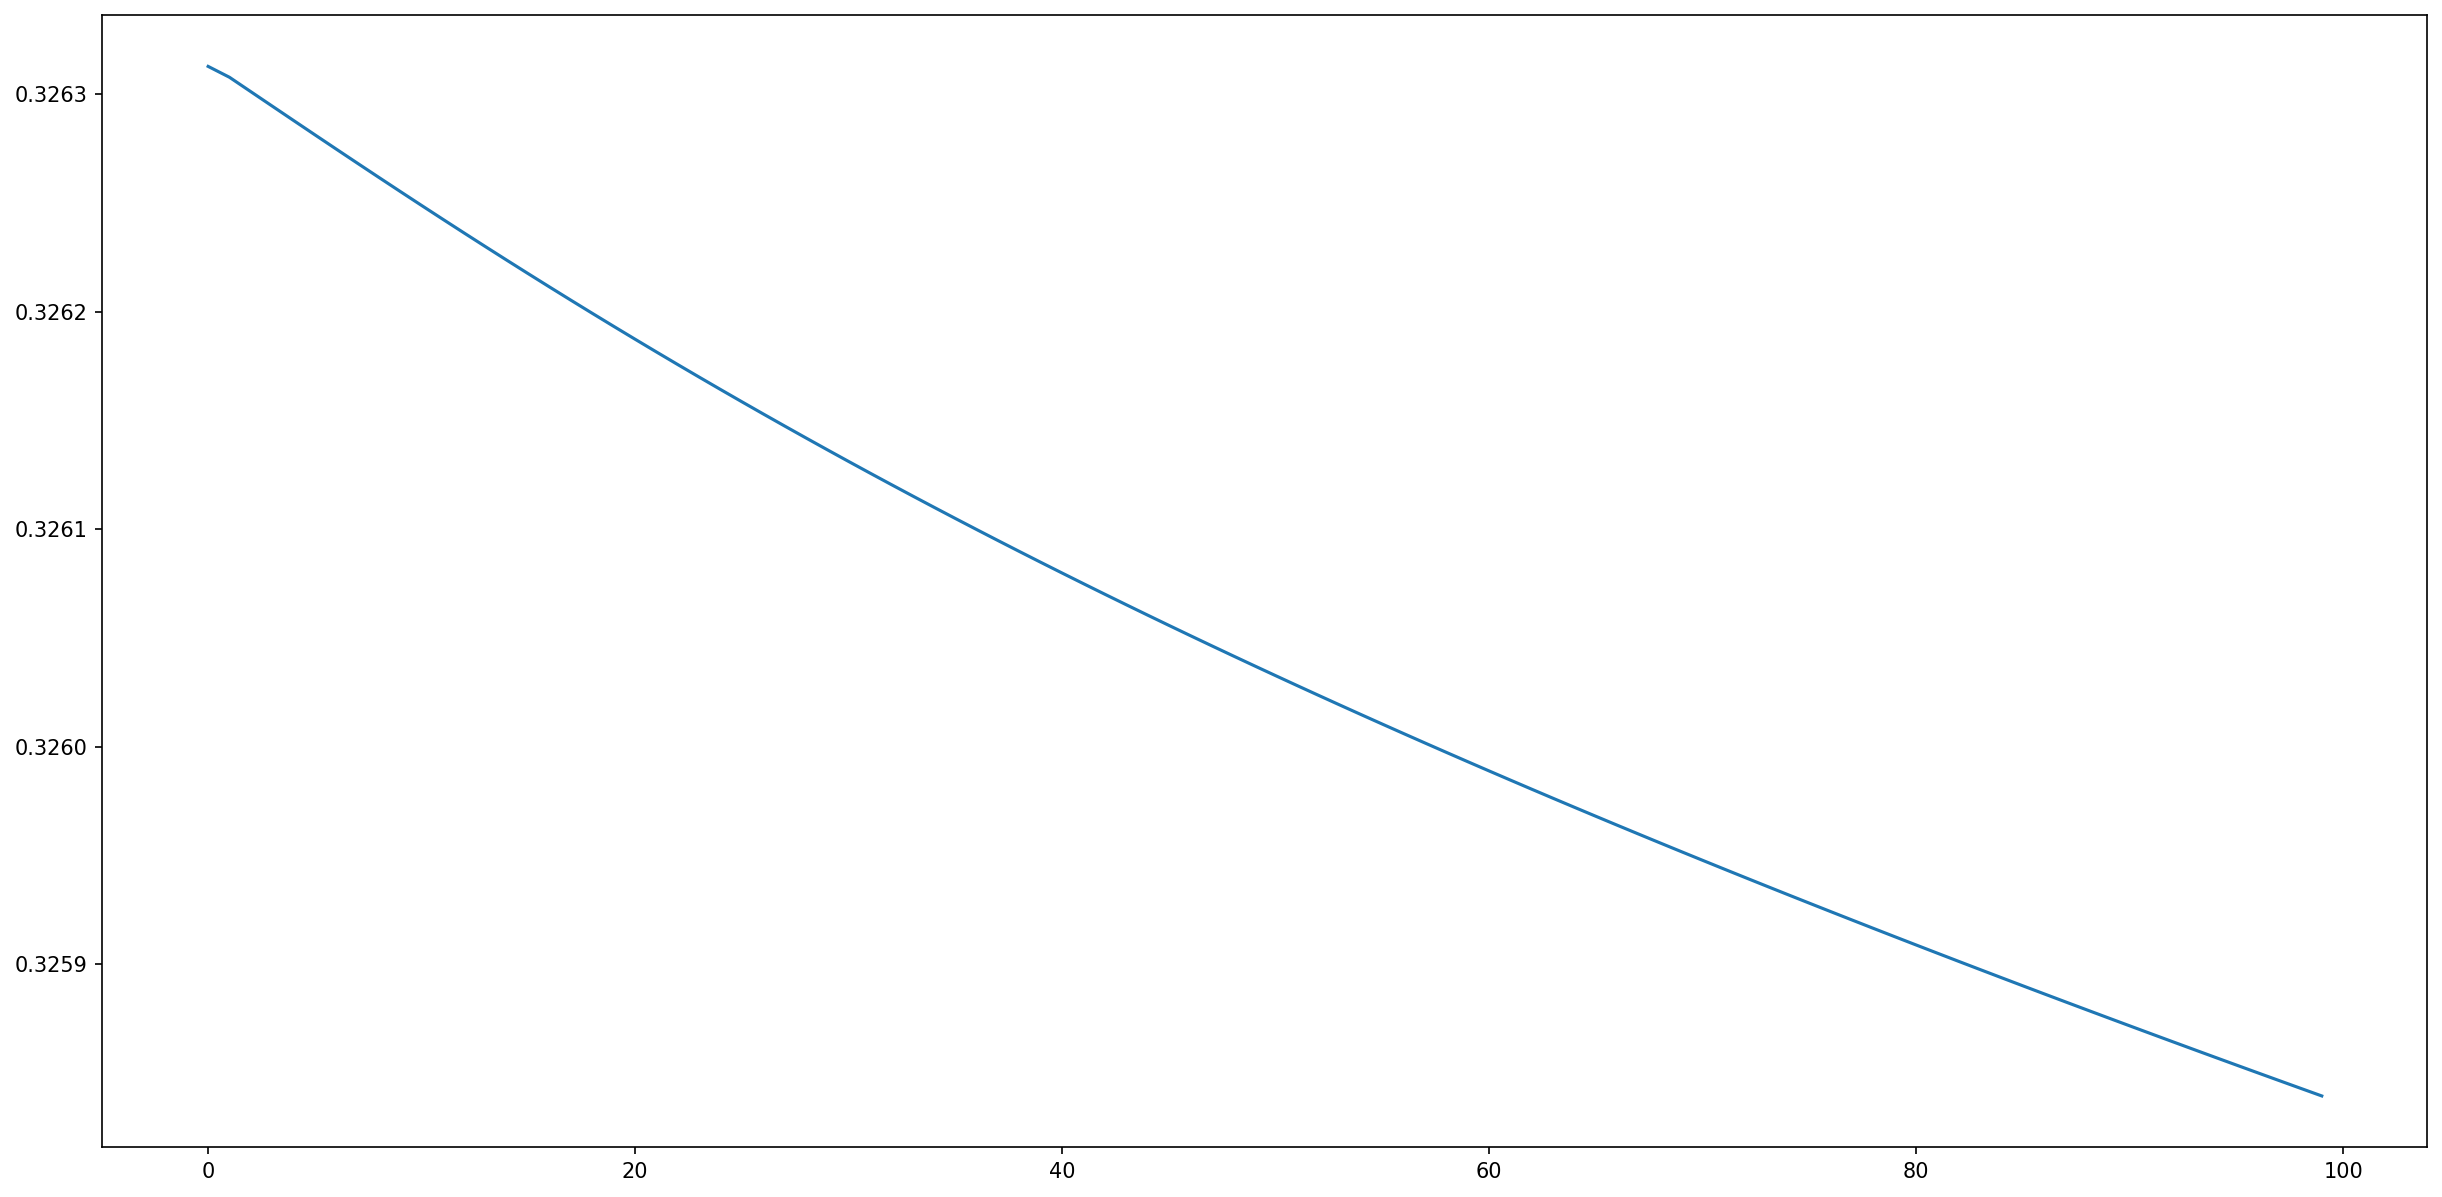

In [191]:
result['r2'].plot.line()